In [1]:
import os
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [2]:
model = YOLO("/media/mo/Mohamed/ME/Coruses/A I/summit/project/monitoring-driver/best.pt")
CLASS_NAMES = ['Distracted', 'Drinking', 'Drowsy', 'Eating', 'PhoneUse', 'SafeDriving', 'Seatbelt', 'Smoking']

images_dir = "/media/mo/Mohamed/ME/Coruses/A I/summit/project/monitoring-driver/test/images"
images = [os.path.join(images_dir, img) for img in os.listdir(images_dir) if img.endswith(('.jpg', '.png', '.jpeg'))]


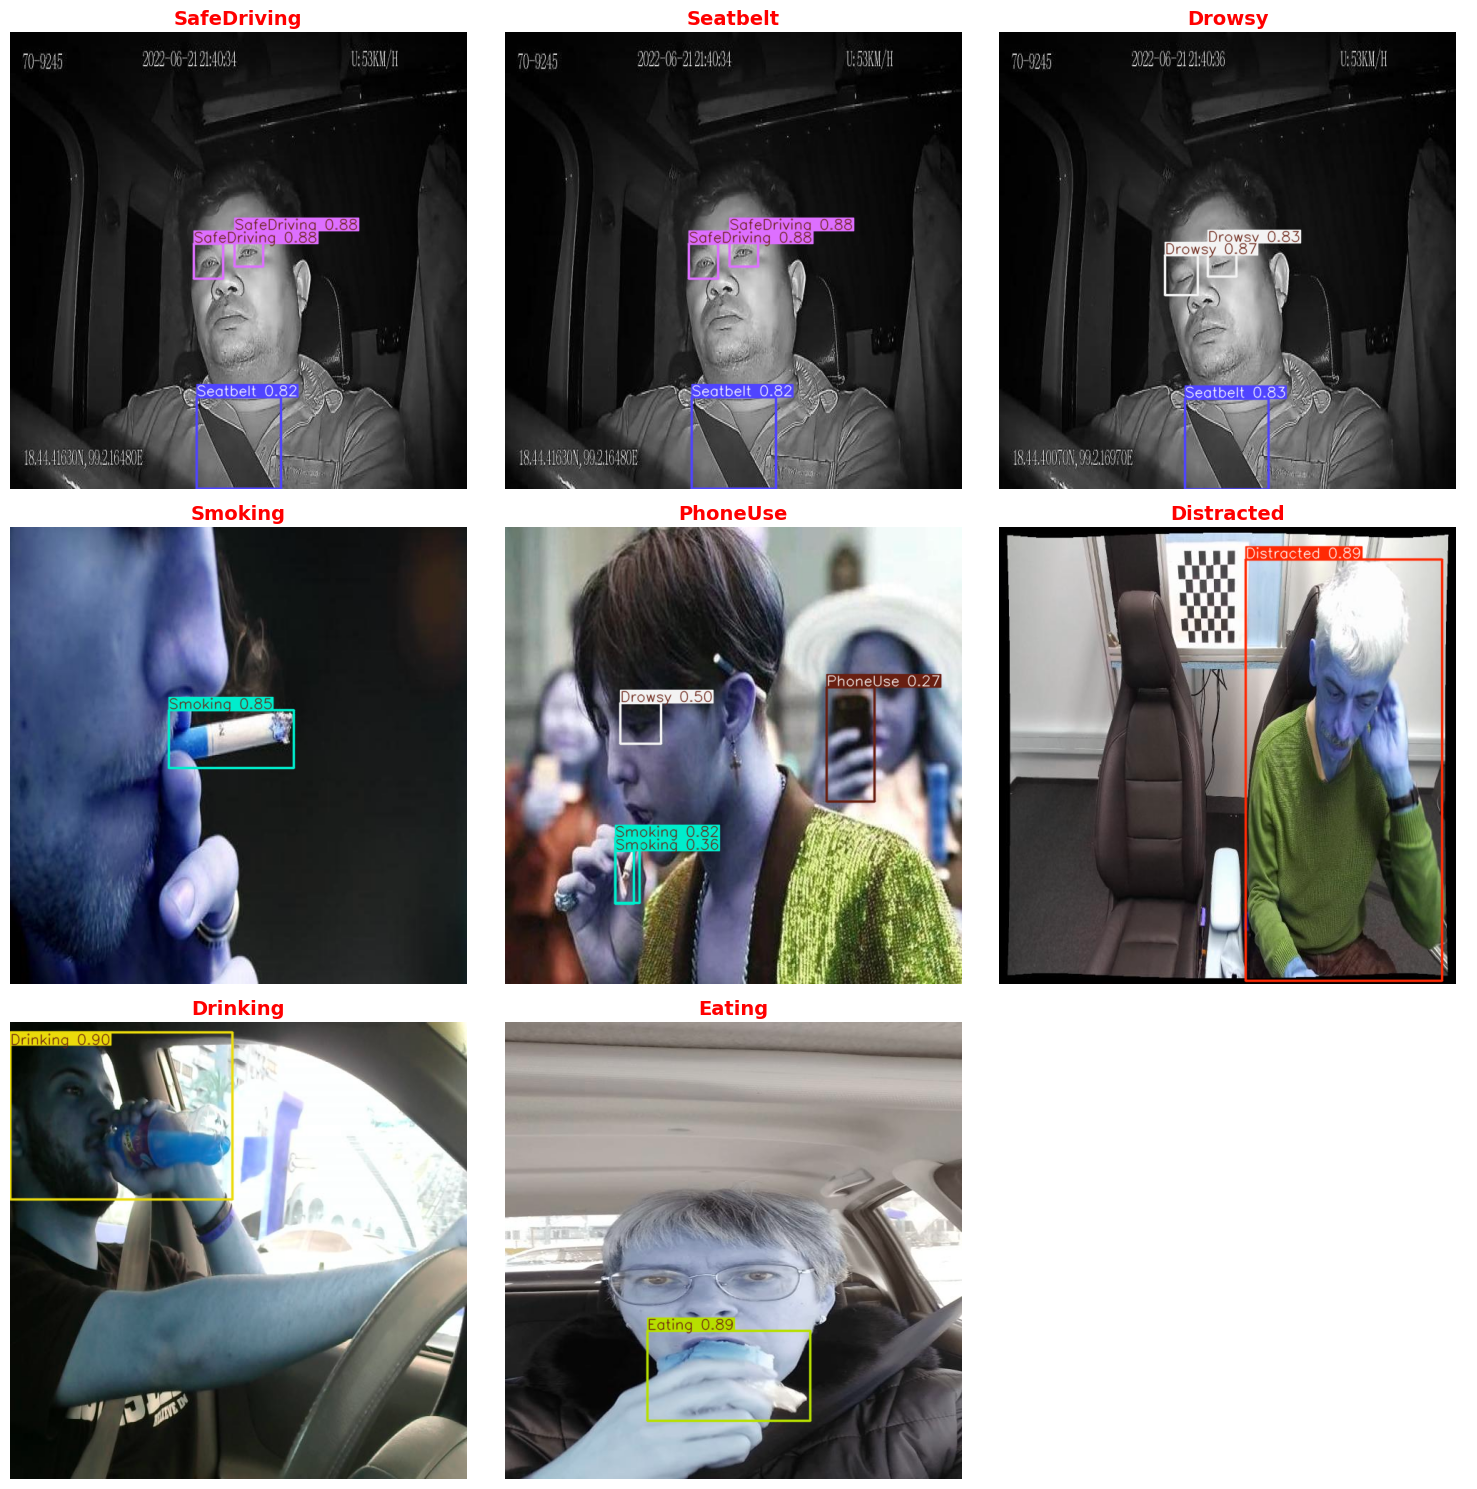

In [3]:
class_images = {}
for img_path in images:
    results = model(img_path, verbose=False)[0]
    for box in results.boxes:
        cls_id = int(box.cls[0])
        cls_name = CLASS_NAMES[cls_id]
        if cls_name not in class_images:
            class_images[cls_name] = img_path
        if len(class_images) == len(CLASS_NAMES):
            break
    if len(class_images) == len(CLASS_NAMES):
        break

num_classes = len(class_images)
cols = 3
rows = (num_classes + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()
for idx, (cls_name, img_path) in enumerate(class_images.items()):
    results = model(img_path, verbose=False)[0]
    plotted_img = results.plot()
    axes[idx].imshow(plotted_img)
    axes[idx].axis('off')
    axes[idx].set_title(cls_name, fontsize=14, fontweight='bold', color='red')

for j in range(idx + 1, rows * cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()